In [10]:
from pathlib import Path
from omegaconf import OmegaConf
import numpy as np
import pandas as pd
from src.ml_utils import downsample_negatives
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

filepaths = OmegaConf.load("../configs/filepaths/base.yaml")

In [16]:
split_idx = 0
exp_id = '0'
model_id = '2037b6b3ceaa4819acf4884636a1f540'

dataset = 'sprhea'
toc = 'v3_folded_pt_ns'
split_strategy = 'rcmcs'
n_splits = 3
seed = 1234
rng = np.random.default_rng(seed=seed)

In [ ]:
# Load in data
val_data = pd.read_parquet(
            Path(filepaths.scratch) / f"{dataset}_{toc}/{split_strategy}/{n_splits}fold" / f"train_val_{split_idx}.parquet"
        )
val_data['protein_embedding'] = val_data['protein_embedding'].apply(lambda x : np.array(x))
downsample_negatives(val_data, 1, rng)

logits = np.load(f"logits_{split_idx}.npy") # Load predictions

In [11]:
val_data.head()

,protein_idx,reaction_idx,pid,rid,protein_embedding,smarts,reaction_center,y
0,222,187,Q9KJ20,7694,"[-0.012849729, 0.16863914, -0.07288795, -0.055...",C[S+](CCC(N)C(=O)O)CC1OC(n2cnc3c(N)ncnc32)C(O)...,"[[[0, 1], [1]], [[14], [0, 1]]]",1
1,223,187,Q83WC3,7694,"[-0.020623509, 0.14122067, -0.12404032, -0.027...",C[S+](CCC(N)C(=O)O)CC1OC(n2cnc3c(N)ncnc32)C(O)...,"[[[0, 1], [1]], [[14], [0, 1]]]",1
2,224,187,Q9KJ21,7694,"[-0.01765835, 0.14142956, -0.0953328, -0.06397...",C[S+](CCC(N)C(=O)O)CC1OC(n2cnc3c(N)ncnc32)C(O)...,"[[[0, 1], [1]], [[14], [0, 1]]]",1
3,13363,187,Q9KJ22,7694,"[-0.044674527, 0.17813939, -0.057687543, -0.07...",C[S+](CCC(N)C(=O)O)CC1OC(n2cnc3c(N)ncnc32)C(O)...,"[[[0, 1], [1]], [[14], [0, 1]]]",1
4,13364,187,Q7U4Z8,7694,"[-0.029929712, 0.16648583, -0.016743593, -0.03...",C[S+](CCC(N)C(=O)O)CC1OC(n2cnc3c(N)ncnc32)C(O)...,"[[[0, 1], [1]], [[14], [0, 1]]]",1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


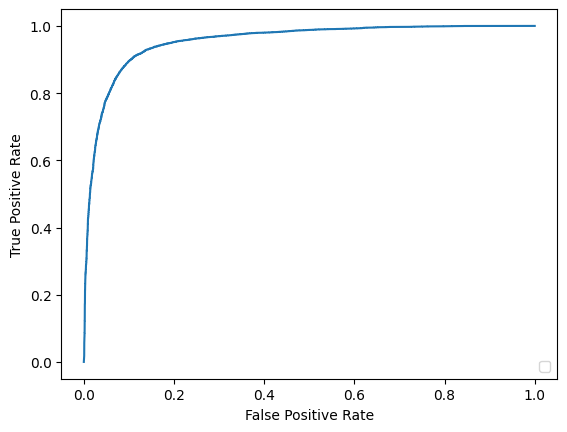

In [19]:
fpr, tpr, _ = roc_curve(val_data['y'], logits)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()